<h1 style="text-align:center;">Лабораторна робота №4</h1>

<p><b>Тема:</b> OpenCV. Просторові методи обробки зображень І. Градаційні перетворення і гістограмні методи (short version) </p>
<p><b>Мета:</b> знайомство з поелементними і гістограмними просторовими методами обробки зображень засобами OpenCV у середовищі Anaconda із застосуванням Jupyter Notebook засобами мови програмування Python.</p>
<h2 style="font-weight:bold; font-size:22px;">Завдання для самостійної роботи</h2>
<p>1. Створити Notebook-документ <lab_3_StudentLastName> за допомогою Jupyter Notebook або Jupyter Lab.</p>
<img src="img\Screenshot_1.jpg" alt="!" style="display:block; margin:auto; width:70%;">
    
<p>2. Відобразити в робочому документі (“зошиті” ipython) виконання пунктів 1-6 наведених нижче, скориставшись інтерактивними посиланнями на відповідну документацію.</p>

<h4>1. <a href="https://www.geeksforgeeks.org/python/negative-transformation-of-an-image-using-python-and-opencv/">Негатив</a></h4><br>
<p>$$s = (L - 1) - r$$</p>
<ul>
    <li>$s$ — це інтенсивність (яскравість) вихідного пікселя.</li>
    <li>$r$ — це інтенсивність вхідного пікселя.</li>
    <li>$L$ — це максимальна кількість рівнів яскравості (наприклад, $L=256$ для 8-бітного зображення).</li>
</ul>

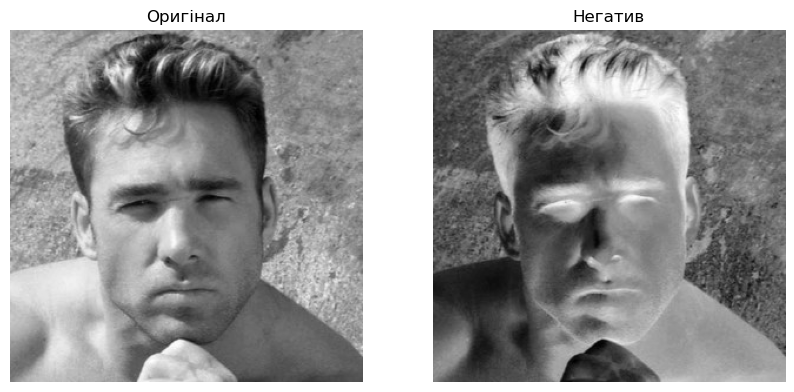

In [8]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

file_path = 'img/photo.png'

img_grayscale = cv.imread(file_path, cv.IMREAD_GRAYSCALE)

if img_grayscale is None:
    print("ПОМИЛКА: Не вдалося завантажити зображення. Перевірте шлях: {}".format(file_path))
else:
    img_inverted = 255 - img_grayscale
    
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(img_grayscale, cmap='gray')
    plt.title("Оригінал")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(img_inverted, cmap='gray')
    plt.title('Негатив')
    plt.axis('off')

    plt.show()

<h4>2. <a href="https://www.geeksforgeeks.org/python/log-transformation-of-an-image-using-python-and-opencv/">Логарифмічні перетворення</a></h4>
<p>$$s = c \cdot \log(1 + r)$$</p>
<ul>
    <li>$s$ — інтенсивність вихідного пікселя.</li>
    <li>$r$ — інтенсивність вхідного пікселя.</li>
    <li>$c$ — константа (коефіцієнт масштабування), що використовується для приведення вихідних значень до потрібного діапазону (наприклад, [0, 255]).</li>
</ul>

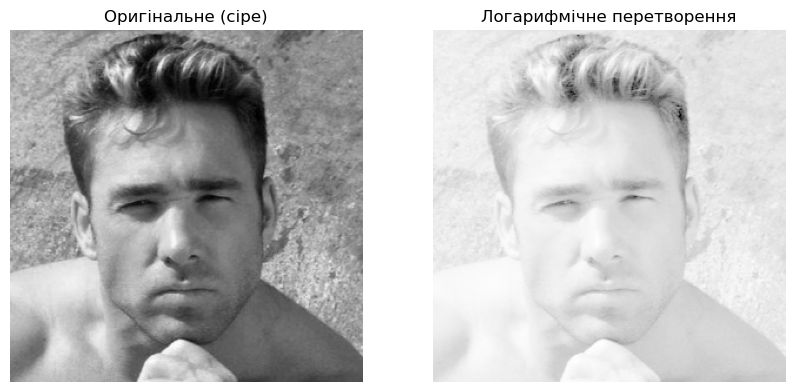

In [7]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

file_path = 'img/photo.png'

image_gray = cv.imread(file_path, cv.IMREAD_GRAYSCALE)

if 'image_gray' not in locals() or image_gray is None:
    print("ПОМИЛКА: Змінна 'image_gray' не знайдена.")
    print("Будь ласка, спочатку запустіть комірку 'Початковий код (Setup)'.")
else:
    c = 255 / np.log(1 + 255)
    log_image = c * np.log1p(image_gray.astype(np.float64))

    image_log = np.array(log_image, dtype=np.uint8)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(image_gray, cmap='gray')
    plt.title("Оригінальне (сіре)")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(image_log, cmap='gray')
    plt.title('Логарифмічне перетворення')
    plt.axis('off')

    plt.show()

<h4>3. <a href="https://docs.opencv.org/3.4/d3/dc1/tutorial_basic_linear_transform.html">Степенева(гамма-коеркція)</a></h4>
$$
s = c \cdot r^\gamma
$$
<ul>
    <li>$s$ — інтенсивність вихідного пікселя.</li>
    <li>$r$ — інтенсивність вхідного пікселя (зазвичай нормалізована до діапазону [0, 1]).</li>
    <li>$\gamma$ — коефіцієнт корекції.</li>
    <li>$c$ — константа, яка використовується для масштабування (часто дорівнює 1).</li>
</ul>

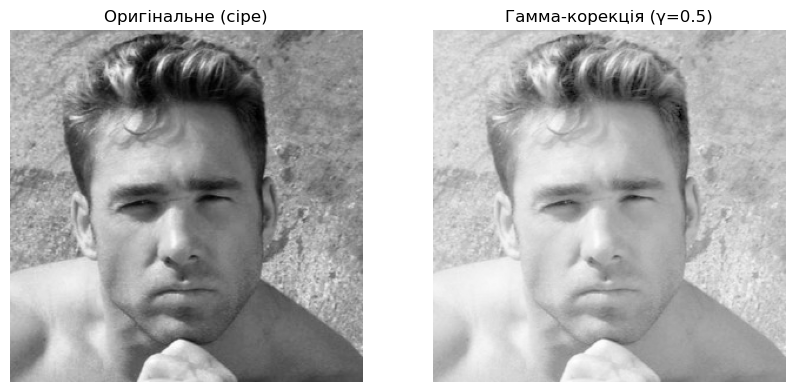

In [10]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

file_path = 'img/photo.png'

image_gray = cv.imread(file_path, cv.IMREAD_GRAYSCALE)

if 'image_gray' not in locals() or image_gray is None:
    print("ПОМИЛКА: Змінна 'image_gray' не знайдена.")
    print("Будь ласка, спочатку запустіть комірку 'Початковий код (Setup)'.")
else:
    gamma = 0.5 
    
    image_norm = image_gray.astype(np.float64) / 255.0

    image_gamma_corrected = np.power(image_norm, gamma)

    image_gamma = np.array(image_gamma_corrected * 255, dtype=np.uint8)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(image_gray, cmap='gray')
    plt.title("Оригінальне (сіре)")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(image_gamma, cmap='gray')
    plt.title(f'Гамма-корекція (γ={gamma})')
    plt.axis('off')

    plt.show()

<h4>4. <a href="https://msameeruddin.hashnode.dev/solarizing-the-image-with-numpy">Соляризація зображення</a></h4>
$$
s = \begin{cases}
r & \text{якщо } r < T \\
(L - 1) - r & \text{якщо } r \ge T
\end{cases}
$$
<p>Для 8-бітного зображення (де $L-1 = 255$):</p>
    <ul>
        <li>Пікселі, темніші за поріг $T$, залишаються без змін.</li>
        <li>Пікселі, яскравіші за поріг $T$, інвертуються (стають негативом).</li>
    </ul>

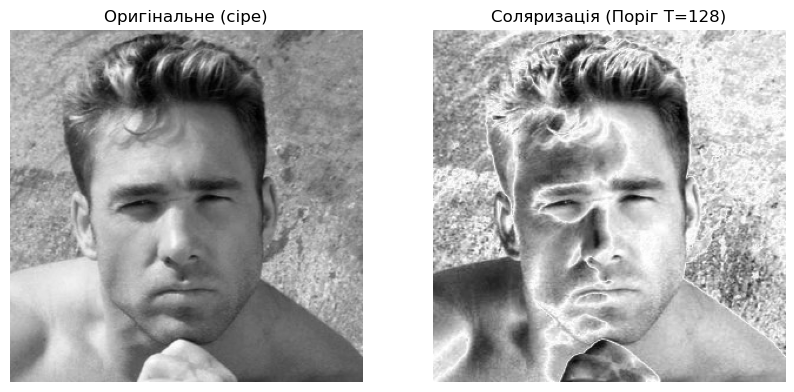

In [11]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

file_path = 'img/photo.png'

image_gray = cv.imread(file_path, cv.IMREAD_GRAYSCALE)

if 'image_gray' not in locals() or image_gray is None:
    print("ПОМИЛКА: Змінна 'image_gray' не знайдена.")
    print("Будь ласка, спочатку запустіть комірку 'Початковий код (Setup)'.")
else:
    T = 128
    
    image_solarized = image_gray.copy()

    high_pixels_mask = (image_gray >= T)

    image_solarized[high_pixels_mask] = 255 - image_solarized[high_pixels_mask]

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(image_gray, cmap='gray')
    plt.title("Оригінальне (сіре)")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(image_solarized, cmap='gray')
    plt.title(f'Соляризація (Поріг T={T})')
    plt.axis('off')

    plt.show()

<h2 style="font-weight:bold; font-size:22px;">Відозміна гістограми</h2>
<h4>5. <a href="https://habr.com/ru/articles/244507/">Еквалізація гістограми 1</a></h4>
<p>І ще приклад <a href="https://docs.opencv.org/4.x/d5/daf/tutorial_py_histogram_equalization.html">тут</a></p>
<p>Еквалізація гістограми — це техніка автоматичного посилення контрасту. Вона працює шляхом аналізу початкового розподілу яскравостей пікселів (тобто гістограми) і його модифікації.</p>
<p>Мета полягає в тому, щоб зробити гістограму більш пласкою та рівномірно розподіленою по всьому діапазону [0, 255]. Це досягається шляхом "розтягування" вузьких піків яскравості (де скупчено багато пікселів) на ширший діапазон.</p>
<p>Простіше кажучи, цей метод бере пікселі, що мають схожі рівні яскравостей, і робить їх більш виразними, збільшуючи загальну контрастність зображення. Це особливо корисно для тьмяних або "засвічених" фотографій.</p>

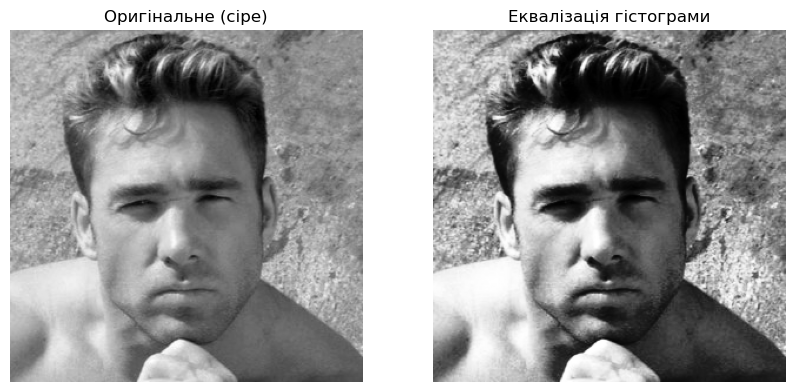

In [13]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

file_path = 'img/photo.png'

image_gray = cv.imread(file_path, cv.IMREAD_GRAYSCALE)

if 'image_gray' not in locals() or image_gray is None:
    print("ПОМИЛКА: Змінна 'image_gray' не знайдена.")
    print("Будь ласка, спочатку запустіть комірку 'Початковий код (Setup)'.")
else:
    image_equalized = cv.equalizeHist(image_gray)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(image_gray, cmap='gray')
    plt.title("Оригінальне (сіре)")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(image_equalized, cmap='gray')
    plt.title('Еквалізація гістограми')
    plt.axis('off')

    plt.show()

<h4>6. <a href="https://docs.opencv.org/4.x/d6/dc7/group__imgproc__hist.html#ga6ca1876785483836f72a77ced8ea759a">Оцінка гістограми</a></h4>
<p><a href="https://docs.opencv.org/4.x/d8/dbc/tutorial_histogram_calculation.html">Ще одне посилання</a></p>
<p>Оцінка гістограми — це фундаментальний метод статистичного аналізу зображення. По суті, це процес вивчення того, як часто зустрічається кожен рівень яскравості (від 0 до 255) на всій площині зображення.</p>
<p>Сенс такої оцінки полягає в тому, що форма гістограми миттєво дає нам уявлення про загальні характеристики зображення:</p>
<ul>
    <li>Контраст: Якщо гістограма "вузька" і всі пікселі скупчені в невеликому діапазоні (наприклад, тільки середні сірі тони), це означає, що зображення має низький контраст.</li>
    <li>Яскравість: Якщо піки гістограми зміщені вліво, зображення є переважно темним; якщо вправо — світлим.</li>
</ul>
<p>Таким чином, оцінка гістограми є діагностичним інструментом. Вона допомагає зрозуміти, чи потребує зображення корекції (наприклад, еквалізації для покращення контрасту) або надає інформацію для сегментації (наприклад, пошук порогу для бінаризації).</p>

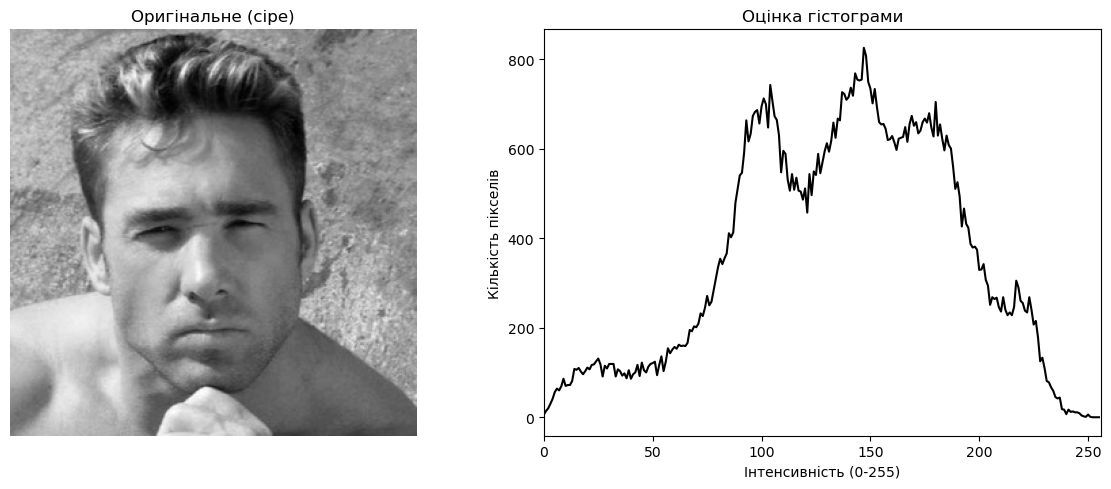

In [15]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

file_path = 'img/photo.png'

image_gray = cv.imread(file_path, cv.IMREAD_GRAYSCALE)

if 'image_gray' not in locals() or image_gray is None:
    print("ПОМИЛКА: Змінна 'image_gray' не знайдена.")
    print("Будь ласка, спочатку запустіть комірку 'Початковий код (Setup)'.")
else:
    hist_original = cv.calcHist([image_gray], [0], None, [256], [0, 256])

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(image_gray, cmap='gray')
    plt.title("Оригінальне (сіре)")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.plot(hist_original, color='black')
    plt.title('Оцінка гістограми')
    plt.xlabel('Інтенсивність (0-255)')
    plt.ylabel('Кількість пікселів')
    plt.xlim([0, 256])
    
    plt.tight_layout()
    plt.show()

<h2 style="font-weight:bold; font-size:22px;">Контрольні запитання</h2>

<ol>
    <li>У чому полягає сенс градаційних перетворень?</li><br>
    <p>Сенс градаційних перетворень полягає у попіксельній зміні яскравості зображення.</p>
    <p>Це означає, що нове значення кожного пікселя ($s$) залежить виключно від його початкового значення ($r$) згідно з певною математичною функцією, $s = T(r)$. Це операція, яка розглядає кожен піксель індивідуально (в околі 1x1), не враховуючи сусідні пікселі.</p>
    <p>Метою таких перетворень є зміна візуального представлення зображення, наприклад, для інвертування кольорів (негатив), корекції контрасту (гамма-корекція) або посилення деталей (логарифмічне перетворення).</p>
    <li>На чому ґрунтуються гістограмні методи?</li><br>
    <p>Гістограмні методи ґрунтуються на глобальній статистичній інформації про зображення, а саме на гістограмі — графіку, що показує частоту (кількість) пікселів для кожного рівня яскравості.</p>
    <p>На відміну від градаційних методів, які змінюють піксель лише на основі його власного значення, гістограмні методи змінюють значення пікселя, враховуючи загальний розподіл яскравостей в усьому зображенні.</p>
    <p>Вони використовуються для автоматичного покращення контрасту, як-от еквалізація гістограми, або для знаходження оптимальних порогів сегментації, наприклад, для бінаризації.</p>
</ol>